<a href="https://colab.research.google.com/github/Jepees/-KaburAjaDulu/blob/main/Insight_Mining_KaburAjaDulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study 01 - Kelompok A**
| Nama                          | NIM            |
| ----------------------------- | -------------- |
| Dani Hidayat                  | 11220940000014 |
| Nadira Desriyani              | 11220940000071 |
| Marwah Habibah Rangkuti       | 11220940000040 |
| Rihadatulaisy Nahsya Arawinda | 11220940000059 |


### **Latar Belakang**

Fenomena digital di era media sosial kini tidak hanya menjadi ajang ekspresi, tetapi juga cerminan kondisi sosial masyarakat. Salah satu contoh paling relevan adalah kemunculan dan viralnya hashtag **#KaburAjaDulu**, yang ramai digunakan oleh warganet Indonesia, khususnya generasi muda, sebagai respons terhadap situasi dalam negeri yang dirasa stagnan dan kurang menjanjikan. Tagar ini tidak sekadar menjadi tren, melainkan telah berkembang menjadi simbol kolektif dari kegelisahan, kritik, dan harapan akan kehidupan yang lebih baik di luar negeri.

Isu yang muncul dalam percakapan publik ini berkaitan erat dengan berbagai permasalahan struktural seperti ketidakpastian hukum, minimnya lapangan kerja, kurangnya apresiasi terhadap profesi tertentu, hingga lemahnya kepercayaan terhadap kebijakan pemerintah. Dalam kondisi demikian, migrasi untuk bekerja, studi, atau menetap di luar negeri muncul sebagai alternatif yang dianggap lebih menjanjikan oleh sebagian besar pengguna media sosial, khususnya generasi muda yang menjadi aktor dominan dalam isu ini.

Melalui pendekatan analisis media sosial,khususnya dari platform **X (Twitter)** dan **Youtube**, fenomena ini dapat dibacasebagai bentuk ketidakpuasan publik. Pembahasan ini mencerminkan bagaimana media sosial menjadi arena penting bagi masyarakat dalam membentuk opini, membangun identitas kolektif, serta menilai arah masa depan mereka baik di dalam maupun di luar negeri.

Oleh karena itu, studi ini memfokuskan perhatian pada **analisis sosial media** untuk mengidentifikasi dinamika percakapan, topik utama pembahasan, dan potensi implikasi kebijakan dari fenomena **#KaburAjaDulu**. Temuan dari studi ini diharapkan dapat menjadi masukan penting bagi pembuat kebijakan untuk merespons secara lebih relevan dan sensitif terhadap kebutuhan masyarakat, khusnya generasi muda Indonesia masa kini.

# **Install dan Import Data**

In [1]:
!pip install Sastrawi
!pip install bertopic
!pip install unidecode
!pip install squarify
!pip install nltk

In [2]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import squarify
import string
import re

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from matplotlib.colors import LinearSegmentedColormap
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from unidecode import unidecode
from textblob import TextBlob
from bertopic import BERTopic
from html import unescape

plt.style.use('default')

# **PreProcessing**

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Jepees/-KaburAjaDulu/refs/heads/main/tweets-data/Labeling/dataUTSfix.csv")
df.sample(7)

,created_at,username/id_user,full_text,like_count,quote_count,reply_count,retweet_count,tweet_url,Media,label_sentimen
7954,2025-02-18T09:59:40Z,@HanaFi-g6e,Matipun ngk ada yg menyesali kok apa lagi pind...,0,0,0,0,NaN,YouTube,1
4992,Sat May 17 12:57:05 +0000 2025,1410612855783661568,@tanyakanrl : aq uda nggk kuat ditindas oyen d...,1,0,0,0,https://x.com/undefined/status/192372445514838...,X,1
634,Fri Mar 28 12:33:36 +0000 2025,1634857533189001216,@MasBRO_back Realisasi konsep #kaburajadulu nih,0,0,0,0,https://x.com/undefined/status/190559915026543...,X,1
5960,Sun Mar 30 11:17:16 +0000 2025,1337622491913543680,Kl misal kritik pemerintah akan diframing seba...,31,0,1,7,https://x.com/undefined/status/190630471519925...,X,1
2096,2025-02-19T13:50:32Z,@aminwidyantono6927,kalau udah gak punya apa2 ato aset di Indonesi...,0,0,0,0,NaN,YouTube,0
4525,Sat Mar 29 11:20:06 +0000 2025,822805219,@Penyuka_ombak Mending wat #KaburAjaDulu gasik...,0,0,1,0,https://x.com/undefined/status/190594304016828...,X,1
5290,Tue May 27 13:56:07 +0000 2025,1093814539445952512,Hal begini jadi semangat dan motivasi buat pin...,0,0,0,0,https://x.com/undefined/status/192736319030163...,X,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9097 entries, 0 to 9096
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   created_at        9097 non-null   object
 1   username/id_user  9097 non-null   object
 2   full_text         9097 non-null   object
 3   like_count        9097 non-null   int64 
 4   quote_count       9097 non-null   int64 
 5   reply_count       9097 non-null   int64 
 6   retweet_count     9097 non-null   int64 
 7   tweet_url         4339 non-null   object
 8   Media             9097 non-null   object
 9   label_sentimen    9097 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 710.8+ KB


In [5]:
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce', utc=True)
df['created_at'] = df['created_at'].dt.date
df['Media'] = df['Media'].astype('category')
df['label_sentimen'] = df['label_sentimen'].map({-1: "Kontra", 0: "Netral", 1: "Pro" })
df['label_sentimen'] = df['label_sentimen'].astype('category')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9097 entries, 0 to 9096
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   created_at        9097 non-null   object  
 1   username/id_user  9097 non-null   object  
 2   full_text         9097 non-null   object  
 3   like_count        9097 non-null   int64   
 4   quote_count       9097 non-null   int64   
 5   reply_count       9097 non-null   int64   
 6   retweet_count     9097 non-null   int64   
 7   tweet_url         4339 non-null   object  
 8   Media             9097 non-null   category
 9   label_sentimen    9097 non-null   category
dtypes: category(2), int64(4), object(4)
memory usage: 586.7+ KB


In [7]:
df.sample(7)

,created_at,username/id_user,full_text,like_count,quote_count,reply_count,retweet_count,tweet_url,Media,label_sentimen
8584,2025-02-17,@wsadi7024,"Jangan kabur sj dulu, tp kabur sj selamanya sk...",0,0,0,0,NaN,YouTube,Kontra
1537,2025-01-01,1846556840865492992,@syam__________ kabur aja dulu?,0,0,0,0,https://x.com/undefined/status/187441792182248...,X,Netral
7998,2025-02-18,@AmudPatoni,Yang lari dari Indonesia dan bawa hasil bumi ...,0,0,0,0,NaN,YouTube,Kontra
7571,2025-02-18,@Isnawan-t4n,Saya cinta Indonesia tp tidak dengan korupsiny...,0,0,0,0,NaN,YouTube,Pro
3754,2025-02-18,@oedhinoedhin4141,Mati sendiri,0,0,0,0,NaN,YouTube,Netral
4562,2025-03-28,1570980115571679232,Yang bikin makin mantap ada Tryout online grat...,0,0,0,0,https://x.com/undefined/status/190545155129417...,X,Pro
257,2025-02-28,722973919,@ketoprofens Jadi kapan #KaburAjaDulu,0,0,1,0,https://x.com/undefined/status/189545036746035...,X,Pro


In [8]:
df_text = df[['full_text']]
df_text

,full_text
0,@investorgabut Kalo belum banyak punya aset te...
1,Btw yg mau #KaburAjaDulu dipertimbangkan juga ...
2,semua orang pasti punya cara copingnya sendiri...
3,Nah ini mengangkat sisi lain #KaburAjaDulu Bia...
4,sedang rame kerja remote luar negeri dari Indo...
...,...
9092,Biar jadi sentilan utk para pejabat dan birokr...
9093,😂😂😂Kabur aja sana Biar Tambah sedikit Manusia ...
9094,"Bukannya ini banyakan kaum luth, alhamdulillah..."
9095,Indonesia di kuasai para oligarki dan pejabat ...


In [9]:
def cleanText(txt):
    # Hashtag Preprocessing
    # Singkat/Slang
    docx = unidecode(unescape(txt.lower().strip()))
    urlPattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    docx = re.sub(urlPattern,' ', docx) # Remove links
    docx = re.sub(r'[^\w]', ' ', docx) # Remove Symbol, keep "_" ... recommended
    Tokens = TextBlob(docx).words # Tokenisasi
    docx = ' '.join([t for t in Tokens if str(t) not in Sastrawi_StopWords_id and len(t)>2]) # Stopwords filtering
    docx = stemmer.stem(docx)
    return docx # Silahkan latihan tambahkan penanganan Slang/Singkatan

def remove_URL(tweet): # Menghapus URL
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', tweet)

def remove_html(tweet): # Menghapus tag HTML
    html = re.compile(r'<.*?>')
    return html.sub(r'', tweet)

def remove_emoji(tweet): # Menghapus emoji
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
                            "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

def remove_username(tweet): # Menghapus username
    username_pattern = re.compile(r'@\w+')
    return username_pattern.sub(r'', tweet)

def remove_numbers (tweet): # Menghapus angka
    tweet = re.sub(r'\d+', '', tweet)
    return tweet

def remove_symbols (tweet): # Menghapus simbol
    tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

In [10]:
# Visualisasi clean dataset 'full_text'
df_text['cleaning'] = df_text['full_text'].apply(lambda x: remove_URL(x))
df_text['cleaning'] = df_text['cleaning'].apply(lambda x: remove_html(x))
df_text['cleaning'] = df_text['cleaning'].apply(lambda x: remove_emoji(x))
df_text['cleaning'] = df_text['cleaning'].apply(lambda x: remove_username(x))
df_text['cleaning'] = df_text['cleaning'].apply(lambda x: remove_symbols(x))
df_text['cleaning'] = df_text['cleaning'].apply(lambda x: remove_numbers(x))

df_text.sample(7)

,full_text,cleaning
1384,bisa ngga kabur aja dulunya kerjaan remote dul...,bisa ngga kabur aja dulunya kerjaan remote dul...
7570,Ngga usah balik broe karena Indoneaia ngga but...,Ngga usah balik broe karena Indoneaia ngga but...
5196,Mamak pumakenia melakukan aksi kabur aja dulu ...,Mamak pumakenia melakukan aksi kabur aja dulu ...
3003,aku tinggal diAmerika sudah mau 15tahun dan ti...,aku tinggal diAmerika sudah mau tahun dan ting...
1335,Kata meng #kaburajadulu,Kata meng kaburajadulu
5794,@ytrndand nasib jadi warga wakanda ya gini pen...,nasib jadi warga wakanda ya gini pendidikan g...
3114,Ini juga mengapa saya cukup sinis dengan serua...,Ini juga mengapa saya cukup sinis dengan serua...


In [11]:
print(f"total baris duplikat sebelum dihapus: {df_text.duplicated().sum()}")
df_text = df_text.drop_duplicates(subset='cleaning', keep='first')
print(f"total baris duplikat setelah dihapus: {df_text.duplicated().sum()}")
df_text.sample(7)

total baris duplikat sebelum dihapus: 33
total baris duplikat setelah dihapus: 0


,full_text,cleaning
7425,Negara ini terlalu memihak pengusaha upah buru...,Negara ini terlalu memihak pengusaha upah buru...
1340,@tanyakanrl Shh beliau Mau ikutan #KaburAjaDulu,Shh beliau Mau ikutan KaburAjaDulu
2837,"I’m also an Indonesian, but since 2010 I’ve be...",Im also an Indonesian but since Ive been roam...
8982,Kalo mau kabur....kabur saja bro jgn kembali l...,Kalo mau kaburkabur saja bro jgn kembali lagi deh
1158,@kopijaemjams Mau #KaburAjaDulu dia,Mau KaburAjaDulu dia
3018,Bagus juga sih... Tunggu pergantian pemimpin y...,Bagus juga sih Tunggu pergantian pemimpin yg l...
3408,Lebih baik di luar di sini banyak outsourching...,Lebih baik di luar di sini banyak outsourching...


In [12]:
df = df[df['full_text'].isin(df_text['full_text'])]
df = df.drop_duplicates(subset='full_text', keep='first')
# df = df[['created_at', 'username', 'full_text', 'favorite_count', 'quote_count', 'reply_count', 'retweet_count']]
df.sample(7)

,created_at,username/id_user,full_text,like_count,quote_count,reply_count,retweet_count,tweet_url,Media,label_sentimen
7128,2025-02-19,@budiyanto6303,CM BERISIK DI MEDIA ONLINE SAJA... KAYA GA TAU...,0,0,0,0,NaN,YouTube,Pro
5295,2025-05-27,1765223003674316800,Ayo kita kabur aja dulu ke jepang kek ke korea...,0,0,0,0,https://x.com/undefined/status/192731268672492...,X,Pro
4100,2025-01-23,547823169,Semangat pagi timbul bukan karena telepon dari...,1,0,1,0,https://x.com/undefined/status/188255365161469...,X,Pro
5844,2025-02-28,1154478487,WEF 2022 Japan siap Great Resets PM Khishida m...,20,2,2,9,https://x.com/undefined/status/189530792713903...,X,Pro
3003,2025-02-16,@sakuraij.n,aku tinggal diAmerika sudah mau 15tahun dan ti...,0,0,0,0,NaN,YouTube,Netral
480,2025-03-31,1859524569658425344,#Asean #Smog #trending #southeastAsia #BakarSa...,2,0,1,0,https://x.com/undefined/status/190679429804314...,X,Netral
6034,2025-03-28,1557693391,@ImaLahmuddin @tikalumis @GasMedsos66731 Lah k...,0,0,1,0,https://x.com/undefined/status/190541451313621...,X,Kontra


# **Insight Mining**

## 1. Topik Paling Sering Dibahas

In [13]:
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

def clean_text(text):
    text = str(text).lower()  # lowercase
    text = re.sub(r"http\S+|www\S+|co\S+", "", text)  # hapus URL
    text = re.sub(r"@\w+", "", text)  # hapus mention
    text = re.sub(r"#", "", text)  # hapus simbol #
    text = re.sub(r"\d+", "", text)  # hapus angka
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)  # hapus tanda baca
    text = " ".join([word for word in text.split() if word not in stopwords])  # hapus stopwords
    text = re.sub(r"\s+", " ", text).strip()  # hapus spasi berlebih
    return text

In [14]:
dft = df[['full_text']]
dft['cleaned_text'] = dft['full_text'].apply(clean_text)
dft

,full_text,cleaned_text
0,@investorgabut Kalo belum banyak punya aset te...,kalo banyak punya aset tetap tanah air sih kab...
1,Btw yg mau #KaburAjaDulu dipertimbangkan juga ...,btw yg mau kaburajadulu dipertimbangkan kalo m...
2,semua orang pasti punya cara copingnya sendiri...,semua orang punya cara sendiri udah kaburajadu...
3,Nah ini mengangkat sisi lain #KaburAjaDulu Bia...,nah mengangkat sisi kaburajadulu biar jangan a...
4,sedang rame kerja remote luar negeri dari Indo...,sedang rame kerja remote luar negeri indon vs ...
...,...,...
9092,Biar jadi sentilan utk para pejabat dan birokr...,biar jadi sentilan utk pejabat birokrasi dineg...
9093,😂😂😂Kabur aja sana Biar Tambah sedikit Manusia ...,😂😂😂kabur aja sana biar tambah sedikit manusia ...
9094,"Bukannya ini banyakan kaum luth, alhamdulillah...",bukannya banyakan kaum luth alhamdulillah gak ...
9095,Indonesia di kuasai para oligarki dan pejabat ...,indonesia kuasai oligarki pejabat nya koruptor


In [15]:
texts = dft['cleaned_text'].astype(str).tolist()
# texts = texts[:100]
# texts

In [16]:
# 4. Inisialisasi & fit model
topic_model = BERTopic(language="indonesian", calculate_probabilities=True)  # gunakan bahasa Indonesia
topics, probs = topic_model.fit_transform(texts)

# 5. Lihat daftar topik dominan
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,4285,-1_indonesia_kaburajadulu_yg_aja,"[indonesia, kaburajadulu, yg, aja, kabur, mau,...",[gpp sih br klo mo jd bukan warga negara indon...
1,0,250,0_kerja_gaji_cari_luar,"[kerja, gaji, cari, luar, negeri, lapangan, ti...",[lulusan sarjana yg bekerja perusahaan swasta ...
2,1,161,1_jangan_gak_balik_usah,"[jangan, gak, balik, usah, pergi, minggat, sil...","[jangan balik, kabur aja gak usah balik, kabur..."
3,2,161,2_dulu_kabur_aja_rechat,"[dulu, kabur, aja, rechat, wkwk, sono, usah, g...",[udh kabur aja sono ga usah balik sekalian ga ...
4,3,153,3_negara_apa_kalian_sendiri,"[negara, apa, kalian, sendiri, kau, berikan, n...",[mau kabur silakan kabur kalian hanyalah manus...
...,...,...,...,...,...
111,110,11,110_pribumi_dijajah_abad_bayangan,"[pribumi, dijajah, abad, bayangan, mentalnya, ...","[orang bukan asli pribumi matralis mentalnya, ..."
112,111,11,111_dr_mingkat_insonesua_hafalin,"[dr, mingkat, insonesua, hafalin, sikahkan, mi...",[sdh minggat insonesua tdk butuh sikahkan oerg...
113,112,11,112_balik_dadaaaah_catet_sekrg,"[balik, dadaaaah, catet, sekrg, wwkk, usah, ua...","[kabur aja situlah usah banyak ba usah balik, ..."
114,113,10,113_pergi_repat_gulingnya_maksutnya,"[pergi, repat, gulingnya, maksutnya, dijalan, ...","[udah pergi aja gitu aja kok repat, jadi tki t..."


In [17]:
X =  topic_model.get_topic_info()
X.head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,4285,-1_indonesia_kaburajadulu_yg_aja,"[indonesia, kaburajadulu, yg, aja, kabur, mau,...",[gpp sih br klo mo jd bukan warga negara indon...
1,0,250,0_kerja_gaji_cari_luar,"[kerja, gaji, cari, luar, negeri, lapangan, ti...",[lulusan sarjana yg bekerja perusahaan swasta ...
2,1,161,1_jangan_gak_balik_usah,"[jangan, gak, balik, usah, pergi, minggat, sil...","[jangan balik, kabur aja gak usah balik, kabur..."
3,2,161,2_dulu_kabur_aja_rechat,"[dulu, kabur, aja, rechat, wkwk, sono, usah, g...",[udh kabur aja sono ga usah balik sekalian ga ...
4,3,153,3_negara_apa_kalian_sendiri,"[negara, apa, kalian, sendiri, kau, berikan, n...",[mau kabur silakan kabur kalian hanyalah manus...
5,4,152,4_jepang_korea_bahasa_belajar,"[jepang, korea, bahasa, belajar, gw, kerja, ka...","[mending jepang kaburajadulu, buat mau kaburaj..."
6,5,144,5_korupsi_pejabat_rakyat_koruptor,"[korupsi, pejabat, rakyat, koruptor, indonesia...",[orang indonesia cintai warisan leluhur indone...
7,6,129,6_indonesia_pergi_balik_silahkan,"[indonesia, pergi, balik, silahkan, minggat, a...",[alhamdulillah jgn balik mampus aja lo disono ...
8,7,102,7_korupsi_koruptor_hukum_korup,"[korupsi, koruptor, hukum, korup, pejabat, ahl...","[negara korupsi kok bangga, intinya korupsi d ..."
9,8,96,8_kerja_gaji_pekerjaan_lapangan,"[kerja, gaji, pekerjaan, lapangan, bekerja, in...",[sebenarnya indonesia surplus lapangan pekerja...


In [18]:
topic_model.visualize_topics()

In [19]:
for i in range(50):
  print(X['Representation'].iloc[i])

['indonesia', 'kaburajadulu', 'yg', 'aja', 'kabur', 'mau', 'orang', 'negara', 'br', 'dulu']
['kerja', 'gaji', 'cari', 'luar', 'negeri', 'lapangan', 'tinggi', 'sekolah', 'yg', 'pekerjaan']
['jangan', 'gak', 'balik', 'usah', 'pergi', 'minggat', 'silahkan', 'sana', 'kabur', 'ngaruh']
['dulu', 'kabur', 'aja', 'rechat', 'wkwk', 'sono', 'usah', 'ga', 'nikah', 'nkri']
['negara', 'apa', 'kalian', 'sendiri', 'kau', 'berikan', 'negri', 'pergi', 'yg', 'beban']
['jepang', 'korea', 'bahasa', 'belajar', 'gw', 'kerja', 'kaburajadulu', 'utara', 'tokyo', 'japan']
['korupsi', 'pejabat', 'rakyat', 'koruptor', 'indonesia', 'miskin', 'kaya', 'maju', 'negara', 'pemimpin']
['indonesia', 'pergi', 'balik', 'silahkan', 'minggat', 'awas', 'usah', 'gk', 'penduduk', 'siapa']
['korupsi', 'koruptor', 'hukum', 'korup', 'pejabat', 'ahli', 'budaya', 'aparat', 'kkn', 'negara']
['kerja', 'gaji', 'pekerjaan', 'lapangan', 'bekerja', 'indonesia', 'melamar', 'surplus', 'kayah', 'kamboja']
['kaburajadulu', 'anti', 'negara', '

Latar Belakang Tagar:
- Reaksi terhadap kondisi negara indonesia belakangan

Topik yang paling banyak dibahas:
- Penghasilan hidup di luar negeri yang cenderung lebih besar daripada di idonesia.
- Sulitnya mendapatkan pekerjaan di Indonesia.
- Banyaknya kasus korupsi di dalam negeri.
- Kekecewaan masyarakat terhadap kebijakan-kebijakan pemerintah.

- Jepang dan Korea adalah negara yang paling banyak diminati untuk pindah.
- Informasi beasiswa kuliah di luar negeri.

- Dianggap tidak cinta tanah air, tidak nasionalis, dan tidak patriotisme.
- Dianggap pengkhianat bangsa.

## 2. Top 6 Tweet

In [20]:
dft = df[['username/id_user', 'full_text', 'like_count','quote_count', 'reply_count', 'retweet_count', 'tweet_url']]
dft['engagements'] = dft[['like_count','quote_count', 'reply_count', 'retweet_count']].transpose().sum()
dft = dft.sort_values(by='engagements', ascending=False).reset_index(drop=True)
# dft = dft[['username/id_user','engagements']]
dft.head(20)

,username/id_user,full_text,like_count,quote_count,reply_count,retweet_count,tweet_url,engagements
0,68827009,Barusan banget buka website Imigrasi New Zeala...,17725,390,218,3704,https://x.com/undefined/status/189506674559933...,22037
1,1457701454,Lagi mudik sodara-sodara pada ngomong: udah na...,17735,236,132,3536,https://x.com/undefined/status/190663031552464...,21639
2,501800437,Bukti kalau #KaburAjaDulu bisa bikin lebih baik,14630,40,62,5048,https://x.com/undefined/status/190616916541066...,19780
3,735714000000000000,Buat yang mau #KaburAjaDulu via jalur studi se...,13554,235,87,2019,https://x.com/undefined/status/188310991406889...,15895
4,191052956,Yg berencana studi bekerja atau menetap di Nor...,10430,114,85,2523,https://x.com/undefined/status/190673142170562...,13152
5,1209196396374417408,Kabur Aja Dulu Yang udah fed up ama neh negara...,7105,103,53,1366,https://x.com/undefined/status/188489787215784...,8627
6,77729542,Lowongan #KaburAjaDulu relocation ke Tokyo Jep...,6920,225,297,1079,https://x.com/undefined/status/187939824186497...,8521
7,185523454,Gw gk setuju dgn #KaburAjaDulu. Tinggal di Ind...,4044,427,185,330,https://x.com/undefined/status/188512657672523...,4986
8,1196660279049764864,Gak kebayang kalo sampe ada yang punya hati bu...,3282,30,15,971,https://x.com/undefined/status/190639939832794...,4298
9,1037514379913179136,@h0nh0ney @tang__kira kami segenap warga indo ...,3498,0,5,97,https://x.com/undefined/status/190685331997867...,3600


In [21]:
for i in (dft.head(6)['tweet_url']):
    print(i)

https://x.com/undefined/status/1895066745599336483
https://x.com/undefined/status/1906630315524649408
https://x.com/undefined/status/1906169165410664755
https://x.com/undefined/status/1883109914068898062
https://x.com/undefined/status/1906731421705625811
https://x.com/undefined/status/1884897872157847723


Top cuitan #KaburAjaDulu dengan engagement paling tinggi:

<img src="https://raw.githubusercontent.com/Jepees/-KaburAjaDulu/main/assets/Top%201.jpeg" alt="Top 1" width="450"/>

<img src="https://raw.githubusercontent.com/Jepees/-KaburAjaDulu/main/assets/Top%202.jpeg" alt="Top 2" width="450"/>

<img src="https://raw.githubusercontent.com/Jepees/-KaburAjaDulu/main/assets/Top%203.jpeg" alt="Top 3" width="450"/>

<img src="https://raw.githubusercontent.com/Jepees/-KaburAjaDulu/main/assets/Top%204.jpeg" alt="Top 4" width="450"/>

<img src="https://raw.githubusercontent.com/Jepees/-KaburAjaDulu/main/assets/Top%205.jpeg" alt="Top 5" width="450"/>

<img src="https://raw.githubusercontent.com/Jepees/-KaburAjaDulu/main/assets/Top%206.jpeg" alt="Top 6" width="450"/>


## 3. Tren Percakapan

In [22]:
df_x = df[df['Media'] == 'X']
df_yt = df[df['Media'] == 'YouTube']
df_x['created_at'] = pd.to_datetime(df_x['created_at'], errors='coerce')
df_yt['created_at'] = pd.to_datetime(df_yt['created_at'], errors='coerce')

# Tampilkan hasil
df_x.head(5)

,created_at,username/id_user,full_text,like_count,quote_count,reply_count,retweet_count,tweet_url,Media,label_sentimen
0,2025-01-31,49856627,@investorgabut Kalo belum banyak punya aset te...,0,0,0,0,https://x.com/undefined/status/188545203600479...,X,Netral
1,2025-01-31,22586190,Btw yg mau #KaburAjaDulu dipertimbangkan juga ...,116,21,8,25,https://x.com/undefined/status/188544373711722...,X,Netral
2,2025-01-31,1058330000000000000,semua orang pasti punya cara copingnya sendiri...,5,0,1,0,https://x.com/undefined/status/188540005298384...,X,Netral
3,2025-01-31,1688990000000000000,Nah ini mengangkat sisi lain #KaburAjaDulu Bia...,0,0,0,0,https://x.com/undefined/status/188539989524004...,X,Netral
4,2025-01-31,1058330000000000000,sedang rame kerja remote luar negeri dari Indo...,46,1,2,9,https://x.com/undefined/status/188539128952255...,X,Netral


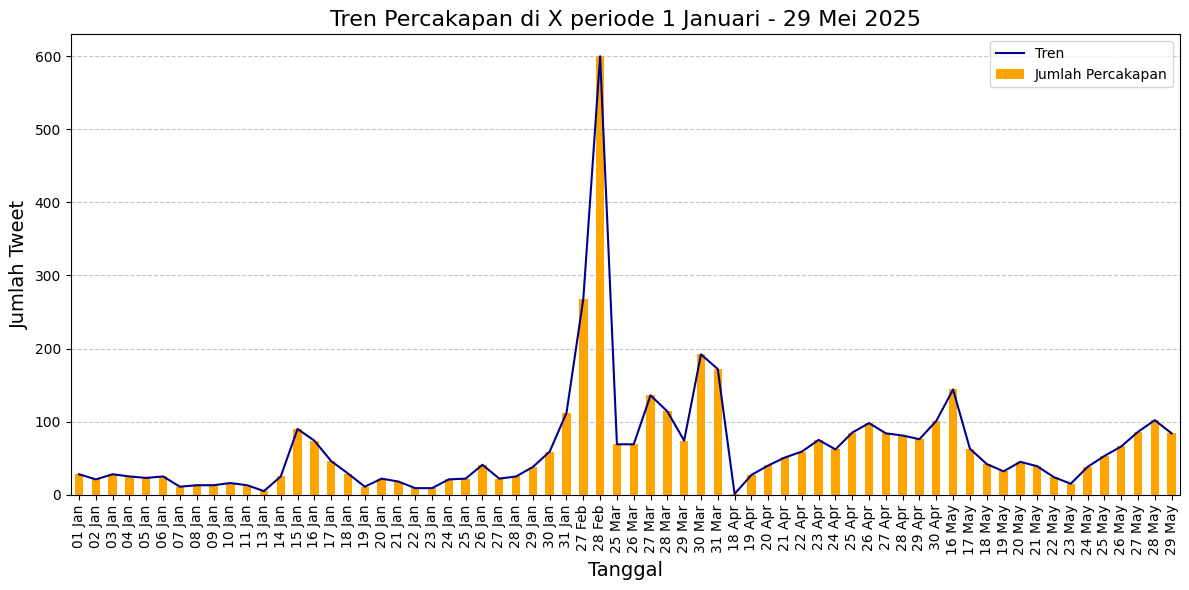

In [23]:
# Pastikan kolom 'created_at' bertipe datetime
df_x['created_at'] = pd.to_datetime(df_x['created_at'])

# Step 2: Grupkan data berdasarkan tanggal (tanpa jam)
counts_per_day = df_x['created_at'].dt.date.value_counts().sort_index()

# Step 3: Plot jumlah tweet per hari dengan garis tren dan titik
plt.figure(figsize=(12, 6))

# Plot batang jumlah tweet per hari
counts_per_day.plot(kind='bar', color='orange', label='Jumlah Percakapan')

# Garis tren
sns.lineplot(x=range(len(counts_per_day)), y=counts_per_day.values, color='#00008B', label='Tren')

# # Titik-titik
# for i, count in enumerate(counts_per_day.values):
#     plt.scatter(i, count, color='skyblue')
#     # plt.text(i, count + 0.5, str(count), ha='center', fontsize=9)

# Format sumbu X: Tanggal dalam format "15 Nov"
labels = [pd.to_datetime(str(date)).strftime('%d %b') for date in counts_per_day.index]
plt.xticks(ticks=range(len(counts_per_day)), labels=labels, rotation=90)

plt.title('Tren Percakapan di X periode 1 Januari - 29 Mei 2025', fontsize=16)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Jumlah Tweet', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

Puncak viral yang menjadikannya titik ekstrem terjadi pada 28 Februari 2025, yang kemungkinan menjadi titik balik wacana publik terkait topik seperti #KaburAjaDulu atau isu nasional lainnya. Percakapan tidak sepenuhnya mereda setelah viral, sebaliknya, stabil dan bahkan tumbuh kembali, mencerminkan adanya ketertarikan yang konsisten dari publik.

In [24]:
dfxt = df_x[['created_at', 'full_text', 'like_count','quote_count', 'reply_count', 'retweet_count']].copy()
dfxt['engagements'] = dfxt[['like_count','quote_count', 'reply_count', 'retweet_count']].transpose().sum()
dfxt = dfxt.sort_values(by='engagements', ascending=False).reset_index(drop=True)
dfxt['created_at'] = dfxt['created_at'].astype('str')
dfxt[dfxt['created_at'] == "2025-02-28"].head(10)
# dfxt[dfxt['created_at'] == "2025-02-27"].head(10)

,created_at,full_text,like_count,quote_count,reply_count,retweet_count,engagements
13,2025-02-28,Tuntutan aksi INDONESIA GELAP gak dipenuhi Mah...,1583,14,29,539,2165
17,2025-02-28,kabur aja dulu https://t.co/fM25zmFffv,1224,76,1,84,1385
19,2025-02-28,Akhirnya Pertamina terkapar di negeri sendiri....,841,7,49,307,1204
41,2025-02-28,@linterrr1 Bro punya portofolio yang bisa buat...,406,0,0,6,412
46,2025-02-28,Teriak di medsos #KaburAjaDulu . Faktanya Yama...,154,11,116,27,308
49,2025-02-28,@AmirahWahdi Temen2 guru saya dorong untuk #Ka...,278,1,1,18,298
59,2025-02-28,Apa aja yang perlu kamu pahami sebelum tanda t...,136,1,1,32,170
69,2025-02-28,Kemarin sore Drone Emprit mendapat kehormatan ...,110,0,4,17,131
70,2025-02-28,@AmirahWahdi Harap diperhatikan juga persyarat...,112,0,0,16,128
75,2025-02-28,Hari kerja terakhir karyawan Sritex... #Indone...,64,3,24,18,109


Menariknya, meskipun puncak percakapan terjadi pada tanggal 28 Februari 2025 dengan jumlah tweet tertinggi, tidak ada satupun tweet dari tanggal tersebut yang masuk dalam daftar top 6 dengan engagement tertinggi. Hal ini menunjukkan bahwa pada tanggal tersebut, percakapan didominasi oleh akun-akun kecil yang menyuarakan pendapat mereka secara masif, namun dengan tingkat interaksi atau keterlibatan yang rendah

In [25]:
dfxt['created_at'] = pd.to_datetime(dfxt['created_at']).dt.date
df_feb8 = dfxt[dfxt['created_at'] == pd.to_datetime('2025-02-28').date()]

# Assign topic ke tiap tweet
# Preprocessing ringan untuk setiap tweet
df_feb8['clean_text'] = df_feb8['full_text'].astype(str).apply(lambda x: re.sub(r"http\S+|@\S+|#\S+|\d+|[^a-zA-Z\s]", '', x.lower()))

# Vectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_feb8['clean_text'])

# LDA dengan 3 topik
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)

# Assign topic ke tiap tweet
topic_values = lda.transform(X)
df_feb8['topic'] = topic_values.argmax(axis=1)

for topic_num in range(3):
    print(f"\n=== Topik #{topic_num+1} ===")

    # Filter tweet sesuai topik
    df_topic = df_feb8[df_feb8['topic'] == topic_num]

    # Ambil 3 tweet pertama sebagai representatif (bisa juga urut dari engagement jika kamu mau)
    top_texts = df_topic['full_text'].head(5).tolist()

    for i, text in enumerate(top_texts):
        print(f"{i+1}. {text}")


=== Topik #1 ===
1. @AmirahWahdi Temen2 guru saya dorong untuk #KaburAjaDulu ke NZ selama di Indonesia belum mendapat penghargaan yang sesuai mana gara2 beberapa oknum juga langsung dihujat abis2an oleh netizen Pemerintah harus didorong memberi kesejahteraan yang lebih baik untuk guru2
2. @AmirahWahdi Harap diperhatikan juga persyaratan2-nya. Tetap Semangat! #KaburAjaDulu #IndonesiaGelap https://t.co/j9ycneMxpw
3. Kalau ada dri kalian2 yang mau #KaburAjaDulu ke jepang. Hal yg paling utama adalah kuasai bahasa baik2 bahasa jepang ( kalau bisa fasih ) supaya tdk mengalami hal2 yg tdk enak selama bekerja disana. https://t.co/Cba3zrEAHD
4. @starfess dia bahagia banget karna dia bisa #KaburAjaDulu
5. Buat yang mau #KaburAjaDulu ke jepang https://t.co/fzihVQI317

=== Topik #2 ===
1. Tuntutan aksi INDONESIA GELAP gak dipenuhi Mahasiswa segel Gedung DPRD Solo. Hidup Mahasiswa #IndonesiaGelap #KaburAjaDulu https://t.co/2GBA4doqB0
2. kabur aja dulu https://t.co/fM25zmFffv
3. Teriak di medsos #K

Berikut adalah tiga Topik utama seputar #KaburAjaDulu pada tanggal tersebut. apresiasi profesi di dalam negeri. Kedua, sebagai respon terhadap kondisi sosial-ekonomi yang makin gelap, tagar ini digunakan untuk meluapkan kekecewaan. Dan ketiga, percakapan mulai mengarah pada narasi informatif dan inspiratif, seperti bagaimana mempersiapkan diri dan membangun kehidupan baru di luar negeri.

In [26]:
dfxt['created_at'] = pd.to_datetime(dfxt['created_at']).dt.date
df_may16 = dfxt[dfxt['created_at'] == pd.to_datetime('2025-05-16').date()]

# Assign topic ke tiap tweet
# Preprocessing ringan untuk setiap tweet
df_may16['clean_text'] = df_may16['full_text'].astype(str).apply(lambda x: re.sub(r"http\S+|@\S+|#\S+|\d+|[^a-zA-Z\s]", '', x.lower()))

# Vectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_may16['clean_text'])

# LDA dengan 3 topik
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)

# Assign topic ke tiap tweet
topic_values = lda.transform(X)
df_may16['topic'] = topic_values.argmax(axis=1)

for topic_num in range(3):
    print(f"\n=== Topik #{topic_num+1} ===")

    # Filter tweet sesuai topik
    df_topic = df_may16[df_may16['topic'] == topic_num]

    # Ambil 3 tweet pertama sebagai representatif (bisa juga urut dari engagement jika kamu mau)
    top_texts = df_topic['full_text'].head(5).tolist()

    for i, text in enumerate(top_texts):
        print(f"{i+1}. {text}")


=== Topik #1 ===
1. @Darumdar1mdaa @tanyakanrl Kucing pun menggaungkan #KaburAjaDulu
2. Iya juga jangan2 gak balik lg tuh doi ngikutin yg kmaren sempet ngetrend #KaburAjaDulu
3. @sseemsms @karimakayyim Tingkatin skill banyak nimbrung di komunitas internasional sebar cv ke perusahaan asing sebanyak2nya. Temen2 gw yg #KaburAjaDulu soalnya gt. Gw aja yg masih gak beruntung. Tiap kali di approach ada aja yg bikin gagal. ‍
4. @tjepicepi @PHN316 giliran mas nya #KaburAjaDulu dinyinyirin https://t.co/OpvHAdNdN8
5. @tanyakanrl Dia ga ada harapan buat tinggal di indonesia makanya dia ikut trend #kaburajadulu

=== Topik #2 ===
1. HAH KURSUS BAHASA INGGRIS CUMA 8.000 / JAM ??? ️ LEBIH MURAH DARI SEBLAK DONG OTW DAFTAR karena mimin juga mau persiapan #KaburAjaDulu https://t.co/0h8Uk1Smaz
2. @txtorangjualan @tanyakanrl Kucingnya menerapkan #KaburAjaDulu
3. Si meng ikutan #KaburAjaDulu
4. @BudiBukanIntel Pendidikan gak rata =&gt; sekolah rakyat Keuangan mikro bermasalah =&gt; KOMERA BUMN gak berAKH

Sebagian besar tweet mencerminkan kekecewaan atau kritik terhadap kondisi Indonesia, seperti ketidakpastian masa depan, frustasi terhadap sistem, dan dorongan untuk "kabur" demi mencari peluang yang lebih baik. Di sisi lain, banyak pengguna menggunakan tagar ini secara humoris atau sarkastik, menjadikannya bagian dari meme dan bahasa internet yang ringan namun tajam. Selain itu, muncul juga narasi yang lebih personal, di mana individu membagikan cerita hidup atau motivasi pribadi yang berkaitan dengan migrasi, merantau, atau pengalaman traumatis. Lonjakan ini kemungkinan dipicu oleh peristiwa sosial-politik terbaru atau diskursus viral yang memancing orang untuk kembali menggunakan tagar tersebut sebagai sarana ekspresi, baik serius maupun satir. Dengan demikian, kemunculan kembali #KaburAjaDulu mencerminkan dinamika wacana publik yang bersifat responsif, emosional, dan multidimensi.

## 4. Tren Percakapan Per Sentimen

In [27]:
dfs = df[df['Media'] == "X"]
dfs = dfs[['created_at', 'label_sentimen']].groupby(['created_at', 'label_sentimen']).size().unstack(fill_value=0)
dfs

label_sentimen,Kontra,Netral,Pro
created_at,,,
2025-01-01,2,7,19
2025-01-02,0,8,13
2025-01-03,2,9,17
2025-01-04,1,8,16
2025-01-05,0,10,13
...,...,...,...
2025-05-25,0,21,32
2025-05-26,1,21,44
2025-05-27,2,27,57


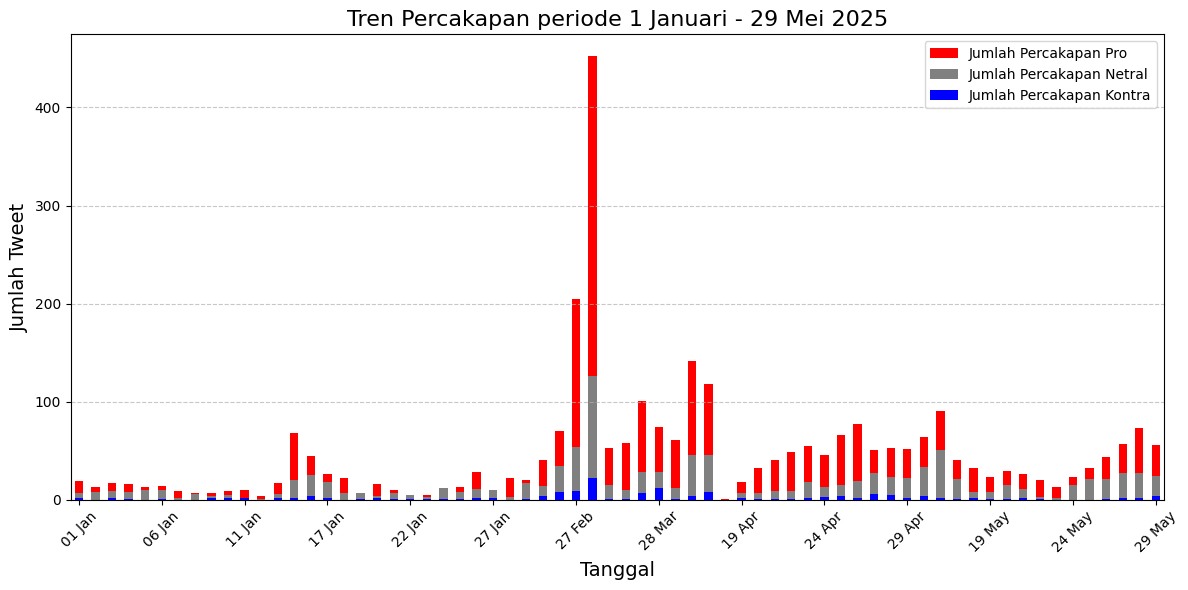

In [28]:
plt.figure(figsize=(12, 6))

# Plot batang jumlah tweet per hari untuk masing-masing label
dfs['Pro'].plot(kind='bar', color='red', label='Jumlah Percakapan Pro')
dfs['Netral'].plot(kind='bar', color='grey', label='Jumlah Percakapan Netral')
dfs['Kontra'].plot(kind='bar', color='blue', label='Jumlah Percakapan Kontra')

# Atur label sumbu x hanya setiap 5 hari sekali
step = 5
x_labels = dfs.index
tick_positions = list(range(0, len(x_labels), step))
tick_labels = [x_labels[i].strftime('%d %b') if hasattr(x_labels[i], 'strftime') else x_labels[i] for i in tick_positions]

plt.xticks(tick_positions, tick_labels, rotation=45)

plt.title('Tren Percakapan periode 1 Januari - 29 Mei 2025', fontsize=16)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Jumlah Tweet', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


Sentimen Pro sangat mendominasi dari awal tanggal hingga akhir. Terdapat pula lonjakan yang ekstrem pada sentimen Pro sekitar awal Maret 2025, dengan lebih dari 450 tweet dalam satu hari. Ini menandakan peristiwa besar telah terjadi. Minimnya kontra menunjukkan adanya kecenderungan publik mendukung gagasan migrasi sebagai solusi atas ketidakpuasan terhadap kondisi dalam negeri. Sentimen netral tetap tinggi,ini menandakan ada user yang serius mempertimbangkan langkah ini secara matang.

## 5. Distibusi Kategori Sentimen

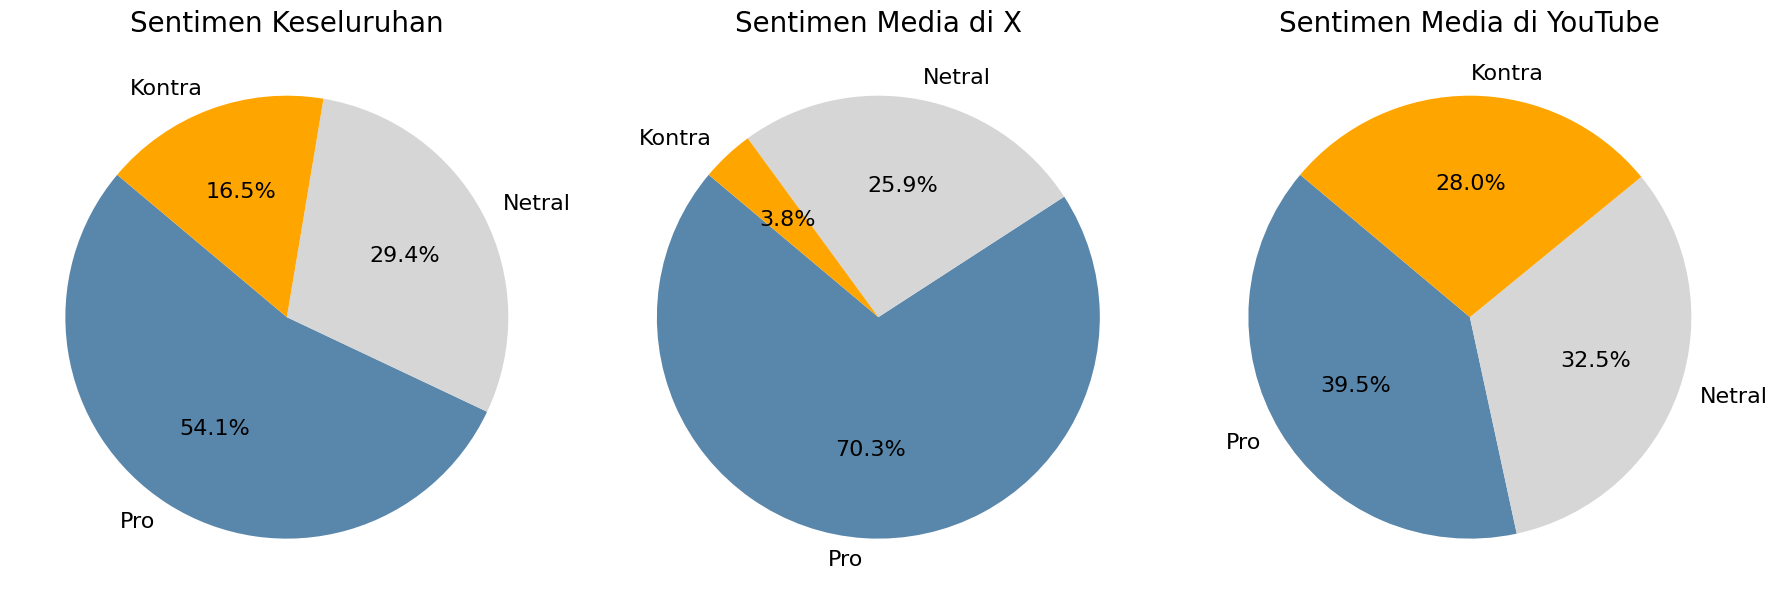

In [29]:
import matplotlib.pyplot as plt

# Hitung distribusi sentimen keseluruhan
sentimen_total = df['label_sentimen'].value_counts()

# Hitung distribusi sentimen untuk masing-masing kategori Media
sentimen_a = df[df['Media'] == 'X']['label_sentimen'].value_counts()
sentimen_b = df[df['Media'] == 'YouTube']['label_sentimen'].value_counts()

# Buat subplot untuk 3 pie chart
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Fungsi bantu untuk membuat pie chart
def plot_pie(ax, data, title):
    colors = ['#5986ab', '#d6d6d6', 'orange']  # warna untuk pro, kontra, netral
    labels = data.index
    ax.pie(
        data,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        textprops={'fontsize': 16}
    )
    ax.set_title(title, fontsize=20)

# Plot semua pie chart
plot_pie(axes[0], sentimen_total, 'Sentimen Keseluruhan')
plot_pie(axes[1], sentimen_a, 'Sentimen Media di X')
plot_pie(axes[2], sentimen_b, 'Sentimen Media di YouTube')

plt.tight_layout()
plt.show()


**Media X** didominasi oleh sentimen positif (pro) sebesar 70.3%, yang mencerminkan tingginya dukungan terhadap gagasan “kabur” atau migrasi sebagai respons atas kondisi yang terjadi di Indonesia. Rendahnya sentimen kontra (3.8%) menandakan bahwa media ini lebih memperkuat narasi yang ada, tanpa banyak ruang untuk kritik atau perdebatan. Sementara itu, sentimen netral (25.9%) menunjukkan bahwa masih ada ruang diskusi yang informatif.

**Media YouTube** menampilkan opini yang lebih berimbang dan beragam. Sentimen pro berada di angka 39.5%, diikuti oleh netral (32.5%) dan kontra (28.0%). Hal ini menunjukkan bahwa YouTube berfungsi sebagai ruang diskusi publik yang lebih terlihat seimbang, dengan munculnya berbagai perspektif, baik yang mendukung, menolak, maupun yang membahas isu secara objektif dan informatif.

Secara keseluruhan, **kedua media** menunjukkan bahwa sentimen positif (pro) masih mendominasi pembicaraan terkait isu “kabur” atau migrasi. Namun, tingkat keseimbangan opini sangat bergantung pada karakteristik masing-masing platform.


## 6. Treemap Hastag

In [30]:
def simpan_tagar(lst):
    hasil = {}
    for i in lst:
        simpan = ''
        for j in i:
            if j == ' ':
                if simpan:
                    if simpan in hasil:
                        hasil[f'{simpan}'] += 1
                    elif simpan not in hasil:
                        hasil[f'{simpan}'] = 1
                simpan = ''
            if simpan and j != ' ':
                simpan += j
            if not simpan and j == '#':
                simpan = '#'

    hasil_2 = {}
    for key, value in hasil.items():
      key = key.lower()  # bisa tambahkan .strip() juga jika perlu
      key = re.sub(r'[^\w#]', '', key)
      if key not in hasil_2 and len(key) > 4:
        hasil_2[f"{key}"] = value
      if key in hasil_2:
        hasil_2[f"{key}"] += value

    return hasil_2

tagar = simpan_tagar(df['full_text'].to_list())
tagar = dict(sorted(tagar.items(), key=lambda x: x[1], reverse=True))
tagar = pd.DataFrame({'username': tagar.keys(), "count": tagar.values()})
tagar[1:20]

,username,count
1,#indonesiagelap,113
2,#viral,48
3,#trending,34
4,#asean,30
5,#smog,30
6,#bakarsampah,30
7,#airpollution,30
8,#southeastasia,28
9,#zonauang,23
10,#trend,23


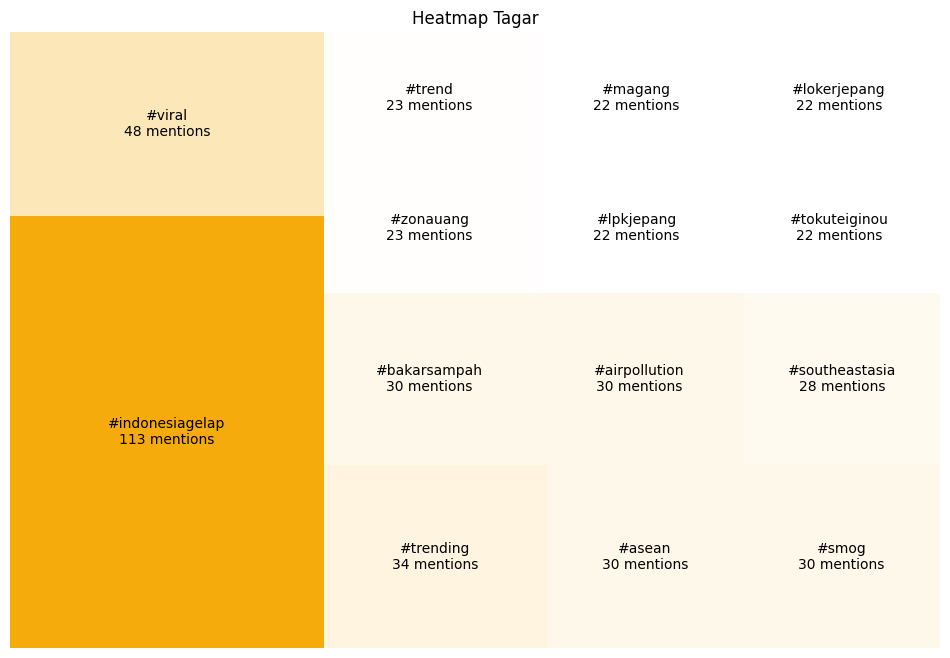

In [31]:
tag_plot = tagar[1:15]

# Menentukan ukuran font berdasarkan ukuran kotak (count)
max_count = max(tag_plot['count'])  # Nilai maksimum sebagai acuan
font_sizes = [10 + (size / max_count) * 20 for size in tag_plot['count']]  # Skala ukuran font

# Membuat label dengan ukuran font yang disesuaikan
labels = [f"{username}\n{count} mentions" for username, count in zip(tag_plot['username'], tag_plot['count'])]

# Membuat custom colormap dari putih ke #f5ab0b
custom_cmap = LinearSegmentedColormap.from_list("custom_orange", ["#ffffff", "#f5ab0b"])

# Normalisasi nilai count untuk mapping warna
norm = mcolors.Normalize(vmin=min(tag_plot['count']), vmax=max(tag_plot['count']))
colors = [custom_cmap(norm(count)) for count in tag_plot['count']]

# Plot treemap
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=tag_plot['count'],
    label=labels,
    color=colors,
    text_kwargs={'fontsize': 10, 'color': 'black'}
)

# Menambahkan judul
plt.title('Heatmap Tagar')

# Menghapus axis
plt.axis('off')

# Menampilkan treemap
plt.show()


- #indonesiagelap (113 mentions)
Tagar ini paling menonjol, menandakan adanya isu utama atau pusat diskusi. ini seiringan dengan ketidakstabilan politik dan metafora kondisi sosial/ekonomi yang buruk, tagar ini menjadi pengait utama topik.
- #airpollution, #smog, #bakarsampah, #southeastasia. Banyak tagar yang berhubungan dengan polusi udara. Ini bisa menjadi pemicu tren #KaburAjaDulu, karena orang-orang mungkin ingin "kabur" dari kondisi lingkungan yang buruk, seperti kabut asap atau polusi parah di Indonesia.
- #zonauang, #pkjepang, #lokerjepang, #tokuteiginou. Tagar-tagar ini menunjukkan minat masyarakat terhadap peluang kerja di Jepang. Ini sejalan dengan tren #KaburAjaDulu yang terkait dengan keinginan untuk mencari kehidupan atau pekerjaan yang lebih baik di luar negeri, khususnya Jepang, yang dikenal dengan program pekerja terampil (tokutei ginou).

## 7. Top 5 influencer

In [32]:
dfp = df[['username/id_user', 'like_count','quote_count', 'reply_count', 'retweet_count']]
dfp['engagements'] = dfp[['like_count','quote_count', 'reply_count', 'retweet_count']].transpose().sum()
dfp = dfp.sort_values(by='engagements', ascending=False).reset_index(drop=True)
# dfp = dfp[['username/id_user','engagements']]
dfp

,username/id_user,like_count,quote_count,reply_count,retweet_count,engagements
0,68827009,17725,390,218,3704,22037
1,1457701454,17735,236,132,3536,21639
2,501800437,14630,40,62,5048,19780
3,735714000000000000,13554,235,87,2019,15895
4,191052956,10430,114,85,2523,13152
...,...,...,...,...,...,...
8982,@anekachanel3860,0,0,0,0,0
8983,@JayaSuprana-g4s,0,0,0,0,0
8984,@acahyono5526,0,0,0,0,0
8985,@somadjulianlim1455,0,0,0,0,0


In [33]:
dfp = dfp.groupby("username/id_user")[['like_count', 'quote_count', 'reply_count', 'retweet_count', 'engagements']].sum().reset_index()
dfp = dfp.sort_values(by='engagements', ascending=False).reset_index(drop=True)
dfp = dfp.head(10)
dfp

,username/id_user,like_count,quote_count,reply_count,retweet_count,engagements
0,501800437,16359,103,184,5471,22117
1,68827009,17725,390,218,3704,22037
2,1457701454,17735,236,132,3536,21639
3,735714000000000000,13559,235,87,2019,15900
4,191052956,10430,114,85,2523,13152
5,1209196396374417408,7238,105,57,1390,8790
6,77729542,6920,225,297,1079,8521
7,185523454,4044,427,185,330,4986
8,1196660279049764864,3282,30,15,971,4298
9,1037514379913179136,3499,0,5,97,3601


In [34]:
for ids in dfp['username/id_user'].tolist():
    print(f"https://twitter.com/intent/user?user_id={ids}")

map_idTop = {   "501800437": "@hrdbacot",
                "68827009": "@AmirahWahdi",
                "1457701454": "@MikaelDewabrata",
                "735714000000000000": np.nan,
                "191052956": "@MN_aliakbar",
                "1209196396374417408": np.nan,
                "77729542": "@briandito",
                "185523454": "@investorgabut",
                "1196660279049764864": "@hokahokabego",
                "1037514379913179136": "@yawdalayaw",
                                    }

https://twitter.com/intent/user?user_id=501800437
https://twitter.com/intent/user?user_id=68827009
https://twitter.com/intent/user?user_id=1457701454
https://twitter.com/intent/user?user_id=735714000000000000
https://twitter.com/intent/user?user_id=191052956
https://twitter.com/intent/user?user_id=1209196396374417408
https://twitter.com/intent/user?user_id=77729542
https://twitter.com/intent/user?user_id=185523454
https://twitter.com/intent/user?user_id=1196660279049764864
https://twitter.com/intent/user?user_id=1037514379913179136


In [35]:
dfp['username'] = dfp['username/id_user'].map(map_idTop)
dfp = dfp[dfp['username'].notna()].reset_index(drop=True)
dfp

,username/id_user,like_count,quote_count,reply_count,retweet_count,engagements,username
0,501800437,16359,103,184,5471,22117,@hrdbacot
1,68827009,17725,390,218,3704,22037,@AmirahWahdi
2,1457701454,17735,236,132,3536,21639,@MikaelDewabrata
3,191052956,10430,114,85,2523,13152,@MN_aliakbar
4,77729542,6920,225,297,1079,8521,@briandito
5,185523454,4044,427,185,330,4986,@investorgabut
6,1196660279049764864,3282,30,15,971,4298,@hokahokabego
7,1037514379913179136,3499,0,5,97,3601,@yawdalayaw


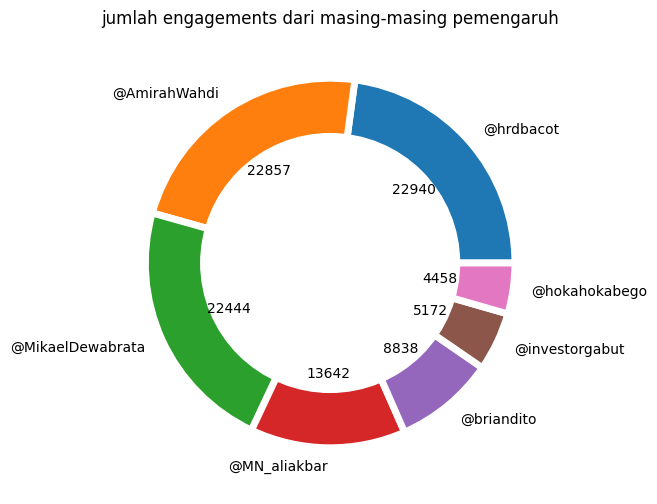

In [36]:
def absolute_value(val):
    total = sum(dfp['engagements'].to_list())
    return f"{int(round(val * total / 100))}"

# Plot pie chart
#labels = [f"{username}\n{count} engagements" for username, count in zip(dfp.head(7)['username'], dfp.head(7)['engagements'])]
plt.figure(figsize=(6, 6))
plt.pie(
    dfp.head(7)['engagements'],
    labels = dfp.head(7)['username'].value_counts().index,
    autopct = absolute_value,
    startangle = 0,
    wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' },
    #explode = [0.1 if k == 'positif' else 0 for k in dfpp['sentimen'].value_counts().index],
    #colors=[colors[k] for k in dfpp['sentimen'].value_counts().index]  # Gunakan warna khusus
)
plt.title('jumlah engagements dari masing-masing pemengaruh')
my_circle=plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

Top Influencer dengan engagement yang tinggi didominasi akun publik yang sering mengkritisi terhadap kebijakan pemerintah

## 8. Akun yang Paling Sering Angkat Isu #KaburAjaDulu

In [37]:
dfr = df[['username/id_user', 'full_text', 'like_count', 'quote_count', 'reply_count', 'retweet_count']]
dfr['engagement'] = dfr[['like_count','quote_count', 'reply_count', 'retweet_count']].transpose().sum()
dfr = dfr[['username/id_user', 'engagement']]
a = dfr.groupby('username/id_user').count()
b = dfr.groupby('username/id_user').sum()
b['jumlah_tweet'] = a['engagement']
dfr = b.sort_values(by='jumlah_tweet', ascending=False).reset_index().head(15)
dfr

,username/id_user,engagement,jumlah_tweet
0,398798880,150,14
1,1859524569658425344,42,12
2,1667310850477293568,2,11
3,1557693391,9,11
4,1717067783165620224,138,8
5,1635057012567576576,5,8
6,1241449891,4,8
7,1351168237342490624,44,8
8,246398684,185,8
9,1688990000000000000,31,7


In [38]:
for ids in dfr['username/id_user'].tolist():
    print(f"https://twitter.com/intent/user?user_id={ids}")

map_idPost = {  '398798880': '@ZoneVenomWar',
                '1859524569658425344': '@Polusi_udara78',
                '1557693391': '@zamal_wilda',
                '1667310850477293568': np.nan,
                '1241449891': '@ayooogr',
                '246398684': '@adith_wp',
                '1351168237342490624': np.nan,
                '1717067783165620224': '@DakotaGeorgy',
                '1635057012567576576': np.nan,
                '1351634274': '@mur1997qi',
                '1176673445263765504': '@Ndrewstjan',
                '@palmtree_': '@palmtree_',
                '501800437': '@hrdbacot',
                '112676042': '@AMDSBSC',
                '1688990000000000000': np.nan,}


https://twitter.com/intent/user?user_id=398798880
https://twitter.com/intent/user?user_id=1859524569658425344
https://twitter.com/intent/user?user_id=1667310850477293568
https://twitter.com/intent/user?user_id=1557693391
https://twitter.com/intent/user?user_id=1717067783165620224
https://twitter.com/intent/user?user_id=1635057012567576576
https://twitter.com/intent/user?user_id=1241449891
https://twitter.com/intent/user?user_id=1351168237342490624
https://twitter.com/intent/user?user_id=246398684
https://twitter.com/intent/user?user_id=1688990000000000000
https://twitter.com/intent/user?user_id=1176673445263765504
https://twitter.com/intent/user?user_id=@palmtree_
https://twitter.com/intent/user?user_id=501800437
https://twitter.com/intent/user?user_id=1351634274
https://twitter.com/intent/user?user_id=112676042


In [39]:
dfr['username'] = dfr['username/id_user'].map(map_idPost)
dfr = dfr[dfr['username'].notna()].reset_index(drop=True)
dfr

,username/id_user,engagement,jumlah_tweet,username
0,398798880,150,14,@ZoneVenomWar
1,1859524569658425344,42,12,@Polusi_udara78
2,1557693391,9,11,@zamal_wilda
3,1717067783165620224,138,8,@DakotaGeorgy
4,1241449891,4,8,@ayooogr
5,246398684,185,8,@adith_wp
6,1176673445263765504,414,7,@Ndrewstjan
7,@palmtree_,0,7,@palmtree_
8,501800437,22117,7,@hrdbacot
9,1351634274,6,7,@mur1997qi


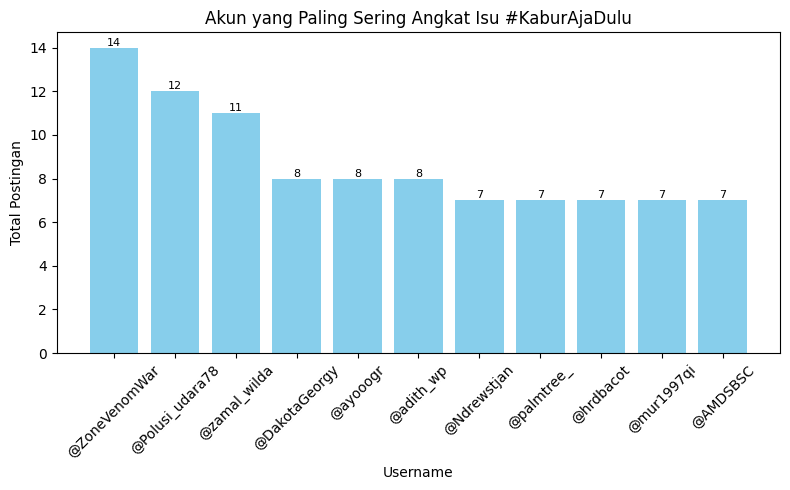

In [40]:
# Buat barplot
plt.figure(figsize=(8, 5))
bars = plt.bar(dfr['username'], dfr['jumlah_tweet'], color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(   bar.get_x() + bar.get_width()/2, yval,  # posisi teks
                f'{yval}', ha='center', va='bottom', fontsize=8)

# Tambahkan label dan judul
plt.xlabel('Username')
plt.ylabel('Total Postingan')
plt.title('Akun yang Paling Sering Angkat Isu #KaburAjaDulu')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

akun-akun yang sering mencuit tentang tagar ini juga didominasi akun publik yang sering mengkritisi terhadap kebijakan pemerintah

## 9. Treemap user berdasarkan jumlah mention

In [41]:
def simpan_mention(lst):
    hasil = {}
    for i in lst:
        simpan = ''
        for j in i:
            if j == ' ':
                if simpan:
                    if simpan in hasil:
                        hasil[f'{simpan}'] += 1
                    elif simpan not in hasil:
                        hasil[f'{simpan}'] = 1
                simpan = ''
            if simpan and j != ' ':
                simpan += j
            if not simpan and j == '@':
                simpan = '@'
    return hasil

mention = simpan_mention(df['full_text'].to_list())
mention = dict(sorted(mention.items(), key=lambda x: x[1], reverse=True))
mention = pd.DataFrame({  'username': mention.keys(),
                    "count": mention.values()})
mention[(mention['count'] < 300) & (mention['count'] > 15)]

,username,count
0,@tanyakanrl,87
1,@tanyarlfes,38
2,@worksfess,27
3,@piyopikavet,26
4,@hrdbacot,25
5,@prabowo,24
6,@ARSIPAJA,22
7,@GasMedsos66731,21
8,@investorgabut,18
9,@kegblgnunfaedh,17


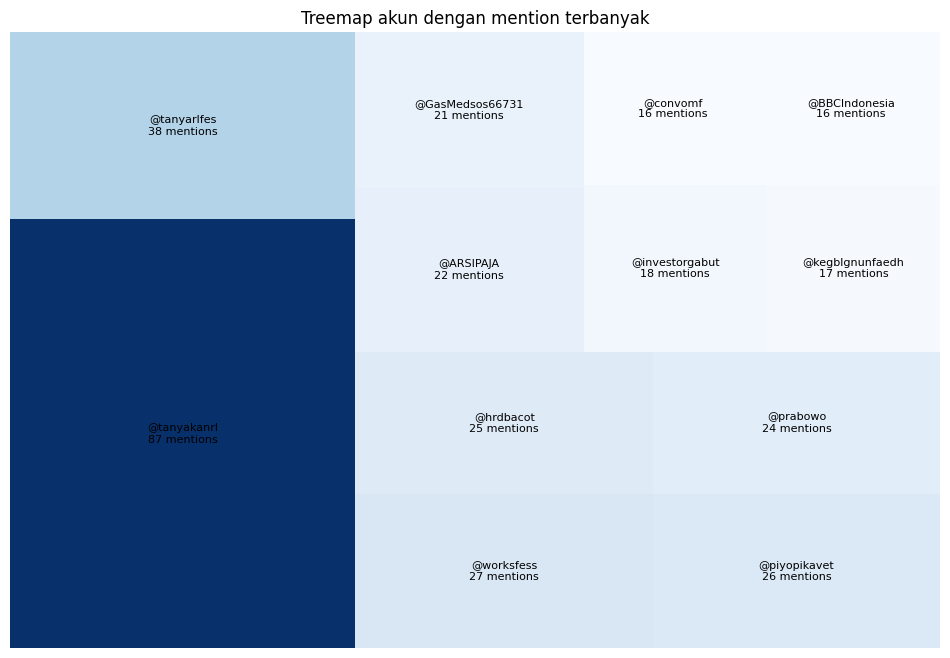

In [42]:
mention_plot = mention[(mention['count'] < 300) & (mention['count'] > 15)]

# Menentukan ukuran font berdasarkan ukuran kotak (count)
max_count = max(mention_plot['count'])  # Nilai maksimum sebagai acuan
font_sizes = [10 + (size / max_count) * 20 for size in mention_plot['count']]  # Skala ukuran font

# Membuat label dengan ukuran font yang disesuaikan
labels = [f"{username}\n{count} mentions" for username, count in zip(mention_plot['username'], mention_plot['count'])]

# Menentukan gradasi warna biru berdasarkan count
norm = mcolors.Normalize(vmin=min(mention_plot['count']), vmax=max(mention_plot['count']))
colors = [plt.cm.Blues(norm(count)) for count in mention_plot['count']]

# Plot treemap
plt.figure(figsize=(12, 8))  # Ukuran figure
squarify.plot(  sizes=mention_plot['count'],
                label=labels,
                color=colors,
                text_kwargs={'fontsize': 8, 'color': 'black'})  # Warna teks

# Menambahkan judul
plt.title('Treemap akun dengan mention terbanyak')

# Menghapus axis
plt.axis('off')

# Menampilkan treemap
plt.show()

- @tanyarlfes, @tanyakanrl, @convomf, @worksfess adalah akun-akun menfess di mana pengguna bisa bercuit tanpa harus menggunakan identitas aslinya. Artinya banyak pengguna yg menggunakan akun-akun ini sebagai perantara untuk berekspresi terhadap tagar ini
- @BBCIndonesia, @CasMedics5731: Kehadiran akun media menunjukkan bahwa tren ini mungkin secara luas, memperkuat narasi #KaburAjaDulu.

# **Kesimpulan dan Saran**

## Kesimpulan

1. Lonjakan Hashtag #KaburAjaDulu sebagai Refleksi Ketidakpuasan Publik

Tagar ini bukan sekadar tren media sosial, tetapi mencerminkan keresahan struktural, terutama dari generasi muda. Percakapan viral pada 28 Februari 2025 bukan dipicu oleh tokoh atau akun besar, melainkan ribuan suara kecil yang secara kolektif menyuarakan kejenuhan terhadap kondisi sosial, ekonomi, dan politik dalam negeri. Hal ini menunjukkan bahwa suara publik yang muncul berasal dari banyak individu biasa, bukan tokoh besar ini mencerminkan keresahan nyata di tengah masyarakat.

2. Motivasi Utama:

Mayoritas sentimen pro lahir dari keinginan untuk mendapatkan kualitas hidup yang lebih baik, terutama dari segi penghasilan dan peluang kerja. Banyak pengguna mengungkapkan bahwa bekerja di luar negeri, terutama di Jepang dan Korea, menawarkan bayaran yang lebih tinggi dan kondisi kerja yang lebih terstruktur. Di sisi lain, sulitnya mencari pekerjaan di Indonesia dan minimnya apresiasi terhadap profesi di dalam negeri mendorong keinginan migrasi.

3. Narasi Negatif Terkait Nasionalisme:

Meskipun hanya 16,5% pengguna menyuarakansentimen negatif, ini tetap signifikan karena menyerang secara identitas/menuduh mereka yang ingin "kabur" sebagai tidak nasionalis, tidak patriotik, atau bahkan pengkhianat bangsa. Pandangan ini biasanya datang dari kelompok yang menjunjung tinggi nasionalisme konvensional, yang mengaitkan cinta tanah air dengan keharusan tinggal dan berjuang di dalam negeri.

4. Stabilitasi Diskusi Pasca-Puncak:

Percakapan seputar #KaburAjaDulu tidak langsung padam setelah viral. Justru tetap stabil dan bahkan mengalami lonjakan kedua pada awal Maret 2025, menandakan adanya peristiwa besar lain yang memperkuat keinginan publik untuk migrasi. Ini menegaskan bahwa isu ini bukan reaktif sesaat, melainkan mencerminkan keprihatinan berkelanjutan.

5. Topik dan Tagar Pendukung:

Tagar-tagar seperti #indonesiagelap, #airpollution, dan #smog menunjukkan bahwa keluhan publik tidak hanya terbatas pada ekonomi,tapi juga menyentuh aspek kualitas hidup secara umum mulai dari ketidakstabilan politik hingga buruknya lingkungan hidup. Tagar-tagar pekerjaan seperti #lokerjepang dan #tokuteiginou juga memperlihatkan arah aspirasi masyarakat yang mulai mempersiapkan diri untuk migrasi secara realistis.

6. Dominasi Sentimen Pro dan Netral:

Sebanyak 54,1% sentimen positif dan 29,4% netral menunjukkan bahwa mayoritas warganet tidak hanya emosional, tetapi serius mempertimbangkan migrasi sebagai solusi jangka panjang. Sentimen netral ini menandakan fase perenungan, bukan sekadar ikut-ikutan tren, dengan banyak diskusi yang mulai masuk ke tahap teknis seperti prosedur legal, keterampilan yang dibutuhkan, dan adaptasi budaya.

## Saran

1. Forum Aspirasi Digital:

Pemerintah perlu membangun platform partisipatif digital lintas kementerian. Untukmengadakan polling, dan diskusi terbuka, dari masyarakat terutama generasi muda terkait harapan hidup dan kerja mereka.

2. Transformasi Narasi Nasionalisme:

Pemerintah dapat meluncurkan kampanye digital dengan tema “Bangga Indonesia, dari Mana Saja” yang menampilkan kisah diaspora Indonesia yang tetap berkontribusi dariluar negeri, serta membangun persepsi nasionalisme yang inklusif dan adaptif.

3. Dasar Kebijakan Ketenagakerjaan Baru:

Pemerintah perlu melakukan riset nasionalberbasis media sosial dan survei lapanganuntuk memetakan alasan dan tujuan migrasigenerasi muda, dan gunakan sebagai bahan penyusunan ulang kebijakan ketenagakerjaan domestik, terutama di sektor informal dan kreatif.

4.  Deteksi Dini Krisis Opini Publik:

Pemerintah dapat mengembangkan sistem pemantauan opini digital yang mengintegrasikan Twitter, YouTube, TikTok, dan platform diskusi lainnya untuk mendeteksi pola-pola krisis wacana publik secara lebih awal.

5. Ruang Aman Diskusi Migrasi Tanpa Stigma:

Pemerintah bisa membangun komunitas digital edukatif tempat anak muda bisa diskusi migrasi, studi luar negeri, atau kerja di luar negeri secara terbuka, aman, dan non-judgmental.